In [1]:
import pickle as pk
import pandas as pd
import numpy as np
import copy

data=pd.read_csv("./Data/BankChurners.csv")

data['Attrition_Flag'] = data['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# # print)str
# scaled_x_train=pd.read_csv("./Data/scaled_x_train_smote2.csv")
# scaled_x_test=pd.read_csv("./Data/scaled_x_test_smote2.csv")
# # pd.read_csv("./Data/scaled_x_test_smote2.csv")
# scaled_x_cv=pd.read_csv("./Data/scaled_x_cv_smote2.csv")

y_test_copy=pd.read_csv("./Data/y_test_smote3.csv")
x_test=pd.read_csv("./Data/x_test_smote3.csv")

X_train_res=pd.read_csv("./Data/X_train_res_smote3.csv")
y_train_res=pd.read_csv("./Data/y_train_res_smote3.csv")

X_train_res=X_train_res.drop('Unnamed: 0',axis=1)
y_train_res=y_train_res.drop('Unnamed: 0',axis=1)
x_test=x_test.drop('Unnamed: 0',axis=1)


y_test_copy=y_test_copy.drop('Unnamed: 0',axis=1)
# scaled_x_test=scaled_x_test.drop('Unnamed: 0',axis=1)
# scaled_x_cv=scaled_x_cv.drop('Unnamed: 0',axis=1)


y_test=y_test_copy

y_valid=pd.read_csv("./Data/y_valid_smote3.csv")
x_valid=pd.read_csv("./Data/x_valid_smote3.csv")

x_valid=x_valid.drop('Unnamed: 0',axis=1)
y_valid=y_valid.drop('Unnamed: 0',axis=1)

y_valid.shape




y_train_res['Attrition_Flag']=y_train_res['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_valid['Attrition_Flag']=y_valid['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_test_copy['Attrition_Flag']=y_test_copy['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})



In [3]:
#  Scaling features
scaler = StandardScaler()
scaler.fit(X_train_res)

scaled_x_train = scaler.transform(X_train_res)
scaled_x_test = scaler.transform(x_test)


scaled_x_valid=scaler.transform(x_valid)
# scaled_y_cv =scaler.transform(y_cv)

scaled_x_train.shape


scaled_x_train.shape

(7675, 32)

In [9]:
from sklearn.decomposition import PCA
pca_final = PCA(n_components=23)
pca_finalDF=pca_final.fit_transform(scaled_x_train)


In [14]:
pcaTestData=pca_final.transform(scaled_x_test)
pcavalidData=pca_final.transform(scaled_x_valid)

In [5]:
pca_reload = pk.load(open("pca_finalDF_data1.pkl",'rb'))
# result_new = pca_reload .transform(X)

In [7]:
pca_reload.shape

(7675, 23)

In [11]:
def create_model(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.Dense(8, activation=activation))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model


In [12]:

import joblib

# joblib.dump(DTmodel, 'DTgrid_NLP.pkl')

from sklearn import metrics

# tfidf_vector_X = xtrain_tfidf_ngram.toarray()  #//shape - (3,6)
# tfidf_vector_valid= xvalid_tfidf_ngram.toarray() #//shape - (3,6)
# tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
# tfidf_vector_valid = tfidf_vector_valid[:, :, None] #//shape - (3,6,1)


# tfidf_vector_X.shape[1:]

from tensorflow import keras
from tensorflow.keras import layers

# input_shape= [x_train.shape[1]]

# NNmodel = create_model(optimizer='adam', activation = 'sigmoid', hidden_layers=1,learning_rate=0.01)




from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [68]:
# sess.run(optimizer._lr)
def create_modelWithDropBatch(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='relu'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [16]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [20]:
pca_finalDF.shape
input_shape

[32]

In [41]:
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

In [22]:

input_shape=[23]
#
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

gridNN_Batch_drop_relu = GridSearchCV(estimator = model_Batch_drop_relu, param_grid = param_grid)

model_Batch_drop_relu.get_params()

history_Batch_drop_relu = gridNN_Batch_drop_relu.fit(
     pca_finalDF, y_train_res,
    validation_data=(pcavalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)

print(history_Batch_drop_relu.best_params_)

print(history_Batch_drop_relu.best_score_)
# print(grid.best_params_)

{'hidden_layers': 6, 'learning_rate': 0.05}
0.9099674344062805


In [43]:
# import timeit

# start = timeit.default_timer()

# #Your statements here

# bestNN=create_modelWithDropBatch(hidden_layers= 6, learning_rate= 0.05)
# history2 = bestNN.fit(
#      pca_finalDF, y_train_res,
#     validation_data=(pcavalidData, y_valid),
#     batch_size=512,
#     epochs=200,
# #     callbacks=[early_stopping],
# )
# stop = timeit.default_timer()

# print('Time: ', stop - start)  


In [58]:
# sess.run(optimizer._lr)
def create_modelWithDropBatchOpt(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='tanh'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [59]:
import timeit

start = timeit.default_timer()

#Your statements here

bestNN2=create_modelWithDropBatchOpt(hidden_layers= 6, learning_rate= 0.05)
history3 = bestNN2.fit(
     pca_finalDF, y_train_res,
    validation_data=(pcavalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  


Epoch 1/200
15/15 [==============================] - 2s 24ms/step - loss: 0.6749 - accuracy: 0.6062 - val_loss: 0.4747 - val_accuracy: 0.8198
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6015 - accuracy: 0.6675 - val_loss: 0.5322 - val_accuracy: 0.6283
Epoch 3/200
15/15 [==============================] - 0s 8ms/step - loss: 0.5281 - accuracy: 0.7441 - val_loss: 0.4508 - val_accuracy: 0.8346
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5596 - accuracy: 0.7346 - val_loss: 0.4505 - val_accuracy: 0.8337
Epoch 5/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5606 - accuracy: 0.7462 - val_loss: 0.4551 - val_accuracy: 0.8327
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5630 - accuracy: 0.7420 - val_loss: 0.4615 - val_accuracy: 0.8351
Epoch 7/200
15/15 [==============================] - 0s 8ms/step - loss: 0.5641 - accuracy: 0.7366 - val_loss: 0.4525 - val_accuracy: 0.8406
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6115 - accuracy: 0.6544 - val_loss: 0.4730 - val_accuracy: 0.8327
Epoch 60/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6130 - accuracy: 0.6618 - val_loss: 0.4931 - val_accuracy: 0.8327
Epoch 61/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6045 - accuracy: 0.6698 - val_loss: 0.4777 - val_accuracy: 0.7522
Epoch 62/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6067 - accuracy: 0.6675 - val_loss: 0.4762 - val_accuracy: 0.8327
Epoch 63/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6098 - accuracy: 0.6595 - val_loss: 0.4785 - val_accuracy: 0.8327
Epoch 64/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6053 - accuracy: 0.6601 - val_loss: 0.4672 - val_accuracy: 0.8327
Epoch 65/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6093 - accuracy: 0.6726 - val_loss: 0.4873 - val_accuracy: 0.8327
Epoch 

15/15 [==============================] - 0s 7ms/step - loss: 0.6392 - accuracy: 0.6629 - val_loss: 0.5096 - val_accuracy: 0.8327
Epoch 117/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6407 - accuracy: 0.6631 - val_loss: 0.5436 - val_accuracy: 0.8327
Epoch 118/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6394 - accuracy: 0.6642 - val_loss: 0.5815 - val_accuracy: 0.8327
Epoch 119/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6368 - accuracy: 0.6664 - val_loss: 0.5300 - val_accuracy: 0.8327
Epoch 120/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6353 - accuracy: 0.6697 - val_loss: 0.5474 - val_accuracy: 0.8327
Epoch 121/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6346 - accuracy: 0.6678 - val_loss: 0.5407 - val_accuracy: 0.8327
Epoch 122/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6402 - accuracy: 0.6650 - val_loss: 0.5666 - val_accuracy: 0.8327
Epoch 123/200

15/15 [==============================] - 0s 7ms/step - loss: 0.6415 - accuracy: 0.6625 - val_loss: 0.5094 - val_accuracy: 0.8327
Epoch 174/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6586 - val_loss: 0.5074 - val_accuracy: 0.8327
Epoch 175/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6376 - accuracy: 0.6669 - val_loss: 0.5518 - val_accuracy: 0.8327
Epoch 176/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6365 - accuracy: 0.6712 - val_loss: 0.5627 - val_accuracy: 0.8327
Epoch 177/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6370 - accuracy: 0.6690 - val_loss: 0.5200 - val_accuracy: 0.8327
Epoch 178/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6412 - accuracy: 0.6620 - val_loss: 0.5074 - val_accuracy: 0.8327
Epoch 179/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6368 - accuracy: 0.6699 - val_loss: 0.5526 - val_accuracy: 0.8327
Epoch 180/200

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy_Score: 66.67100977198697 %
precision_score: 66.67100977198697 %
recall_score: 100.0 %


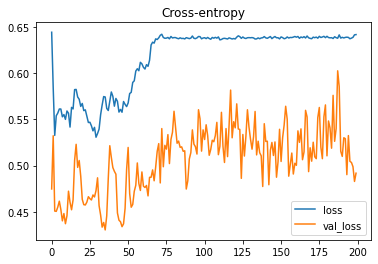

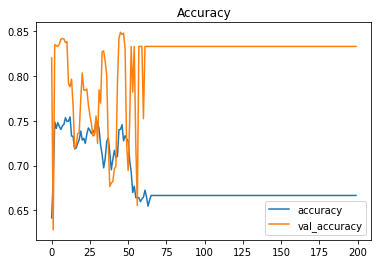

In [61]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

y_pred_SVM = bestNN2.predict_classes(pca_finalDF)


# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_train_res, y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_train_res, y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_train_res, y_pred_SVM)*100,'%')

In [73]:
pca_finalDF.shape

(7675, 23)

In [66]:
# scaled_XKmeans = scaler.transform(pca_finalDF)
# scaled_XValid = scaler.transform(pcavalidData)


# scaled_x_valid=scaler.transform(x_valid)


# df['k_means']=kmeanModel.predict(scaled_x_train)
# df['target']=y_train_res
from sklearn.preprocessing import normalize
scaled_XKmeans=normalize(pca_finalDF, norm='l2', axis=1, copy=True, return_norm=False)
scaled_XValid=normalize(pcavalidData, norm='l2', axis=1, copy=True, return_norm=False)

In [69]:
import timeit

start = timeit.default_timer()

#Your statements here

bestNN=create_modelWithDropBatch(hidden_layers= 6, learning_rate= 0.05)
history2 = bestNN.fit(
     scaled_XKmeans, y_train_res,
    validation_data=(scaled_XValid, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  


Epoch 1/200
15/15 [==============================] - 2s 26ms/step - loss: 0.7435 - accuracy: 0.5950 - val_loss: 0.5494 - val_accuracy: 0.8327
Epoch 2/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6377 - accuracy: 0.6664 - val_loss: 0.5285 - val_accuracy: 0.8327
Epoch 3/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6377 - accuracy: 0.6661 - val_loss: 0.5250 - val_accuracy: 0.8327
Epoch 4/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6375 - accuracy: 0.6647 - val_loss: 0.5173 - val_accuracy: 0.8327
Epoch 5/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6373 - accuracy: 0.6663 - val_loss: 0.5196 - val_accuracy: 0.8327
Epoch 6/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6351 - accuracy: 0.6663 - val_loss: 0.5102 - val_accuracy: 0.8327
Epoch 7/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6244 - accuracy: 0.6754 - val_loss: 0.4357 - val_accuracy: 0.8327
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2825 - accuracy: 0.9025 - val_loss: 0.2826 - val_accuracy: 0.9018
Epoch 60/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2876 - accuracy: 0.8998 - val_loss: 0.2797 - val_accuracy: 0.9067
Epoch 61/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2842 - accuracy: 0.8991 - val_loss: 0.2864 - val_accuracy: 0.8983
Epoch 62/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2778 - accuracy: 0.8981 - val_loss: 0.3040 - val_accuracy: 0.8963
Epoch 63/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2827 - accuracy: 0.9056 - val_loss: 0.3050 - val_accuracy: 0.9028
Epoch 64/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2751 - accuracy: 0.9001 - val_loss: 0.2752 - val_accuracy: 0.9013
Epoch 65/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2805 - accuracy: 0.8985 - val_loss: 0.3189 - val_accuracy: 0.8894
Epoch 

15/15 [==============================] - 0s 8ms/step - loss: 0.2446 - accuracy: 0.9148 - val_loss: 0.2814 - val_accuracy: 0.9087
Epoch 117/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2570 - accuracy: 0.9127 - val_loss: 0.2614 - val_accuracy: 0.9062
Epoch 118/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2634 - accuracy: 0.9081 - val_loss: 0.2783 - val_accuracy: 0.9008
Epoch 119/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2426 - accuracy: 0.9161 - val_loss: 0.2830 - val_accuracy: 0.8968
Epoch 120/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2685 - accuracy: 0.9041 - val_loss: 0.2706 - val_accuracy: 0.8954
Epoch 121/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2622 - accuracy: 0.9047 - val_loss: 0.3139 - val_accuracy: 0.8894
Epoch 122/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2671 - accuracy: 0.9058 - val_loss: 0.2701 - val_accuracy: 0.8978
Epoch 123/200

15/15 [==============================] - 0s 8ms/step - loss: 0.2645 - accuracy: 0.9062 - val_loss: 0.2751 - val_accuracy: 0.9067
Epoch 174/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2523 - accuracy: 0.9107 - val_loss: 0.2880 - val_accuracy: 0.8959
Epoch 175/200
15/15 [==============================] - 0s 10ms/step - loss: 0.2394 - accuracy: 0.9170 - val_loss: 0.2915 - val_accuracy: 0.9033
Epoch 176/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2424 - accuracy: 0.9175 - val_loss: 0.2932 - val_accuracy: 0.8968
Epoch 177/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2407 - accuracy: 0.9162 - val_loss: 0.2868 - val_accuracy: 0.8973
Epoch 178/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2523 - accuracy: 0.9096 - val_loss: 0.3086 - val_accuracy: 0.8835
Epoch 179/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2435 - accuracy: 0.9179 - val_loss: 0.2931 - val_accuracy: 0.8939
Epoch 180/20

In [70]:
def plotconfusionMatrix(modelObj,ytest,xtest):
#     model_DecTreeClass2.fit(X_train_res, y_train_res)
    y_pred_DecTreeClass2 = modelObj.predict_classes(xtest)
    conf_mat2 = metrics.confusion_matrix(ytest, y_pred_DecTreeClass2)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat2,annot=True)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual class")
    plt.show()
    print('Confusion matrix: \n', conf_mat2)
    print('TP: ', conf_mat2[1,1])
    print('TN: ', conf_mat2[0,0])
    print('FP: ', conf_mat2[0,1])
    print('FN: ', conf_mat2[1,0])

def getMetrics(modelObj,xTrain,yTrain,xValid,yValid):
    y_pred_DecTreeClass2 = modelObj.predict_classes(xValid)
    print('Classification report: \n', metrics.classification_report(yValid, y_pred_DecTreeClass2))
    print('Training Accuracy_Score:',metrics.accuracy_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Precision:',metrics.precision_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Recall:',metrics.recall_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    
    print('Training F1 Score:',metrics.f1_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')

    
    print('Validation Accuracy_Score:',metrics.accuracy_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Precision:',metrics.precision_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Recall:',metrics.recall_score(yValid, y_pred_DecTreeClass2)*100,'%')
    
    print('Validation F1 Score:',metrics.f1_score(yValid, y_pred_DecTreeClass2)*100,'%')

<AxesSubplot:title={'center':'Accuracy'}>

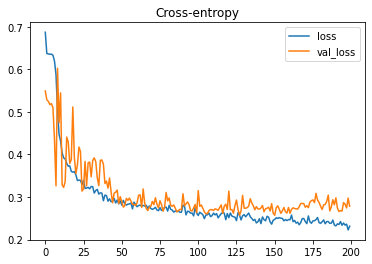

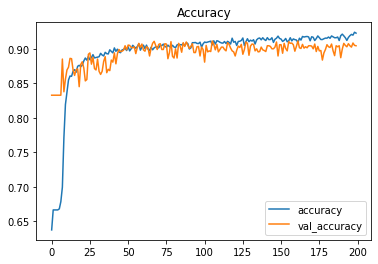

In [71]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


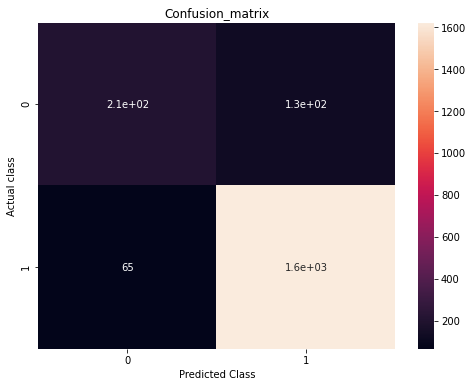

Confusion matrix: 
 [[ 210  129]
 [  65 1622]]
TP:  1622
TN:  210
FP:  129
FN:  65
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.62      0.68       339
           1       0.93      0.96      0.94      1687

    accuracy                           0.90      2026
   macro avg       0.84      0.79      0.81      2026
weighted avg       0.90      0.90      0.90      2026



/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Accuracy_Score: 94.4885993485342 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Precision: 94.06684190762297 %
Training Recall: 97.90893101426617 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training F1 Score: 95.94943981614477 %
Validation Accuracy_Score: 90.42448173741361 %
Validation Precision: 92.63278126784694 %
Validation Recall: 96.1470065204505 %
Validation F1 Score: 94.35718440954042 %


In [72]:

plotconfusionMatrix(bestNN,y_valid['Attrition_Flag'],scaled_XValid)

getMetrics(bestNN,scaled_XKmeans,y_train_res['Attrition_Flag'],scaled_XValid,y_valid['Attrition_Flag'])

<AxesSubplot:title={'center':'Accuracy'}>

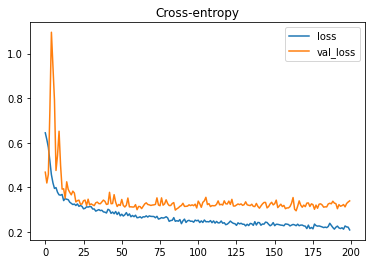

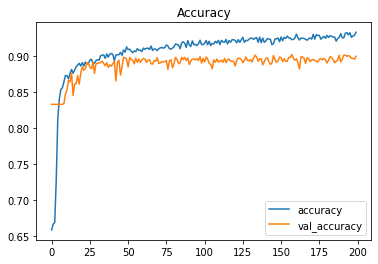

In [26]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [62]:
# y_pred_SVM = bestNN.predict_classes(pca_finalDF)


# # print('Classification report: \n', metrics.classification_report(y_test, model))
# print('Accuracy_Score:',metrics.accuracy_score(y_train_res, y_pred_SVM)*100,'%')


# print('precision_score:',metrics.precision_score(y_train_res, y_pred_SVM)*100,'%')

# print('recall_score:',metrics.recall_score(y_train_res, y_pred_SVM)*100,'%')

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


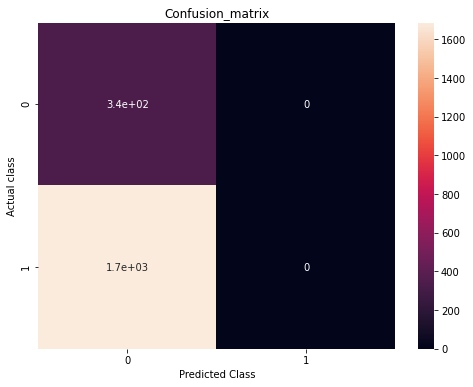

Confusion matrix: 
 [[ 339    0]
 [1687    0]]
TP:  0
TN:  339
FP:  0
FN:  1687
Classification report: 
               precision    recall  f1-score   support

           0       0.17      1.00      0.29       339
           1       0.00      0.00      0.00      1687

    accuracy                           0.17      2026
   macro avg       0.08      0.50      0.14      2026
weighted avg       0.03      0.17      0.05      2026



/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-pack

Training Accuracy_Score: 33.328990228013026 %
Training Precision: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/pytho

Training Recall: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training F1 Score: 0.0 %
Validation Accuracy_Score: 16.732477788746298 %
Validation Precision: 0.0 %
Validation Recall: 0.0 %
Validation F1 Score: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:

plotconfusionMatrix(bestNN,y_valid['Attrition_Flag'],pcavalidData)

getMetrics(bestNN,pca_finalDF,y_train_res['Attrition_Flag'],pcavalidData,y_valid['Attrition_Flag'])